__Машинное обучение:__
* Обучение с учителем
 * Регрессии -> прогнозирование вещественного значения (стоимость недвижимости, цена акций, возраст клиента)
 * Классификации -> прогнозирование к какой группе относится объект ()
  * Алгоритмы: дерево решений, линейная регрессия, логистическая регрессия, ...

* Обучение без учителя
 * Кластеризация -> одинаковые объекты в одной группе, разные объекты - в разных
 * Снижение размерности -> для обучения модели (n - большая, m - более маленькая)
 * Визуализация многомерных данных -> двумерное / трехмерное пространство

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# возраст
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
# y = k*x + b
# y = k_1*x_1 + k_2*x_2 + ... + b

# опыт
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

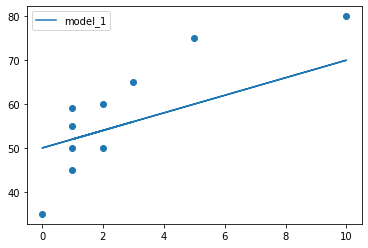

In [4]:
a = 2
b = 50
plt.scatter(X[1,:], y)
# y = a*x + b #
plt.plot(X[1, :], a*X[1, :] + b, label="model_1")
# plt.plot(X[1, :], 2*a*X[1, :] + 50, label="model_2")
plt.legend(loc="best")

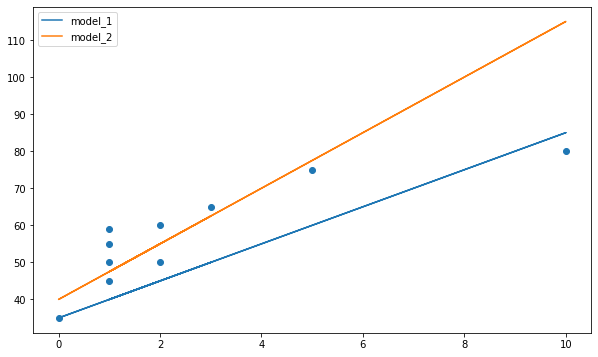

In [5]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5, label="model_1")
plt.plot(X[1], 40*X[0] + X[1]*7.5, label="model_2")
plt.legend(loc="best")

# mse - mean squared error
# mae - mean absolute error

In [6]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [7]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

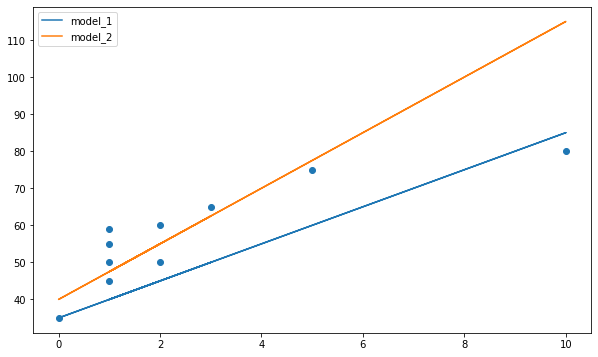

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label="model_1")
plt.plot(X[1], y_pred2, label="model_2")
plt.legend(loc="best")

In [10]:
# 1 - голубая
# 2 - оранжевая

In [11]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [12]:
# Никогда не использовать
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

err1, err2

(9.4, -2.1)

In [13]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [14]:
mae_1, mae_2

(10.4, 7.9)

In [15]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

# np.mean(y - np.mean(y)) = дисперсия = std**2

In [16]:
mse_1, mse_2

(143.6, 151.35)

In [17]:
np.mean([1, 2, 3, 4, 5]), np.mean([1, 2, 3, 4, 50])

(3.0, 12.0)

In [18]:
np.median([1, 2, 3, 4, 5]), np.median([1, 2, 3, 4, 500])

(3.0, 3.0)

__Вывод__:
* MSE - если есть выбросы, и они для вас важны (важны при использовании модели)
* MAE - если выбросы не важны, модель должна работать хорошо на большинстве объектов

Метод наименьших квадратов

In [19]:
X.shape

(2, 10)

In [20]:
X.T.shape

(10, 2)

In [21]:
# X = 1e6 x 1e5

In [22]:
# только для MSE
# ~ d**3
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

In [23]:
# наблюдения, параметры, МНК: наблюдений >> параметров
# наблюдений << параметров. Пример: 

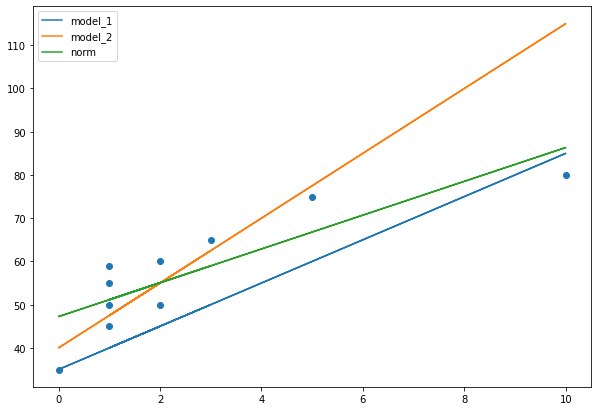

In [24]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label="model_1")
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5, label="model_2")
plt.plot(X[1], W[0] + W[1] * X[1], label="norm")
plt.legend()

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
y_pred_norm = W[0] + W[1] * X[1]
calc_mse(y, y_pred_norm)

45.93750000000002

In [27]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [28]:
calc_mae(y, y_pred1)

10.4

In [29]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [30]:
# RMSE - root mean squared error
np.sqrt(calc_mse(y, y_pred3))

6.777720855862981

In [31]:
calc_mae(y, y_pred3)

6.182142857142859

In [32]:
mse_old = 10.32
mse_new = 10.3199999

delta = 0.1

Градиентный спуск

In [33]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)

(w*x - y)**2

2*z`

w_1, w_2, ..., w_k: 2*x*(w*x - y)
w_0: 2*(w - y)

SyntaxError: invalid syntax (Temp/ipykernel_41216/2950465089.py, line 8)

In [ ]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [ ]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0] - g

1. Подберите скорость обучения (alpha) и количество итераций:

In [106]:
n = X.shape[1]
alpha = 1e-3 # 0.1 скорость обучение
W = np.array([1, 0.5]) # начальные значения
W, alpha

(array([1. , 0.5]), 0.001)

In [107]:
A = []
for i in range(6000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)
        A.append((i, W.copy(), err))

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882
1100 [33.20442544  6.50103962] 151.94853425111427
1200 [34.59041507  6.24510603] 132.03487746741158
1300 [35.83946387  6.01445961] 115.86190418236986
1400 [36.9651021  5.8066019] 102.7269452082483
1500 [37.97952317  5.61928129] 92.05932434403572
1600 [38.89371573  5.45046864] 83.39556413536022
1700 [39.71758274  5.2983353 ] 76.35924911171324
1800 [40.46004868  5.16123328] 70.6446716165486
1900 [41.12915628  5.03767744] 66.00354968859446
2000 [41.73215361  4.92632937] 62.2342399245102
21

In [110]:
len(A)

60

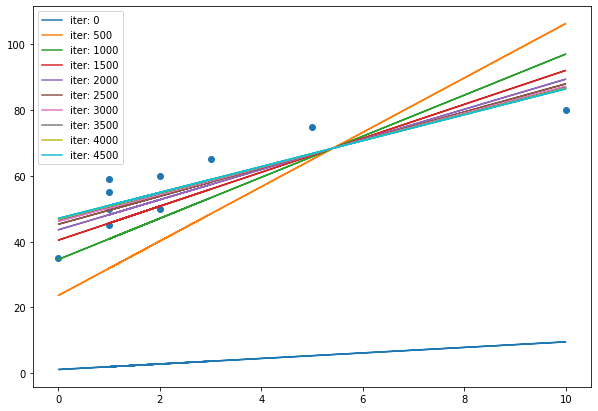

In [111]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
for i in range(10):
    plt.plot(X[1], A[i*6][1][0] + A[i*6][1][1] * X[1], label=f'iter: {A[i*5][0]}')
plt.legend()


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)